In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


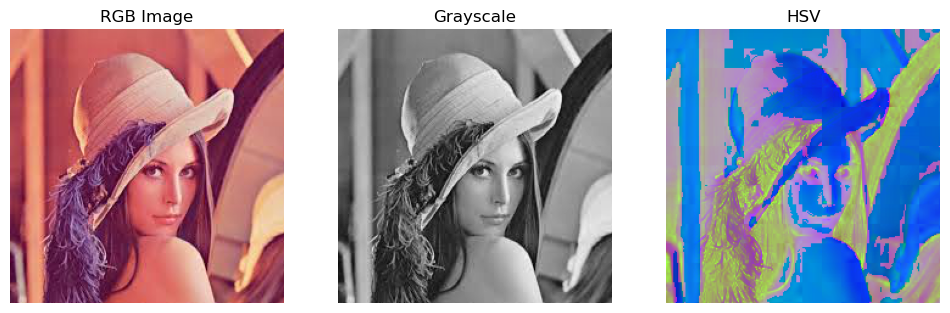

In [14]:
img = cv2.imread("images.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hsv)
plt.title("HSV")
plt.axis("off")

plt.show()


OpenCV reads images in BGR format due to historical reasons and memory efficiency from early camera APIs.
Matplotlib expects RGB, so color mismatch occurs unless conversion is done.
Understanding channel order is crucial to avoid incorrect visual interpretation.

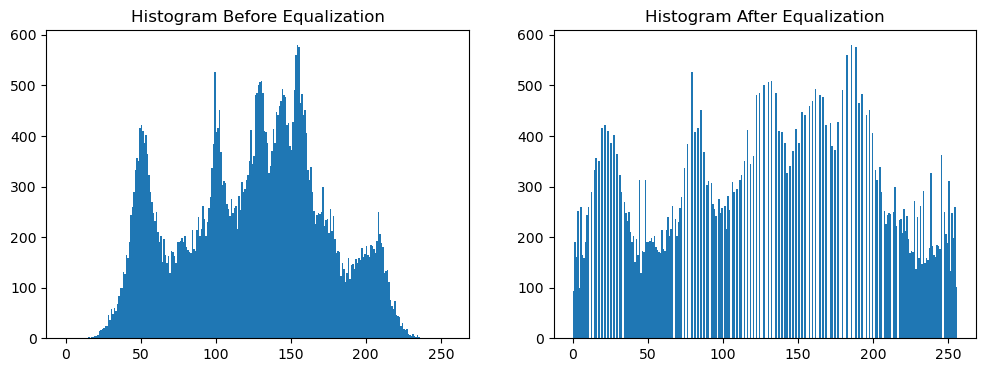

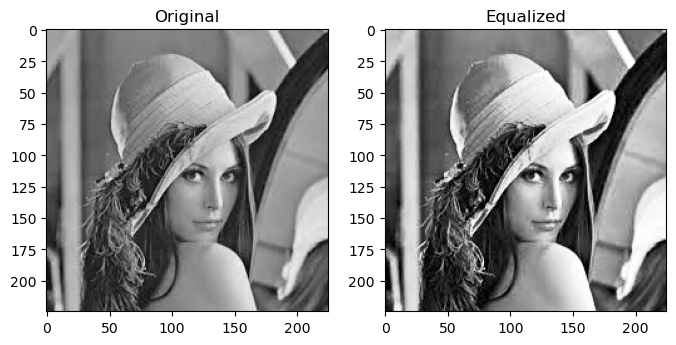

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])
plt.title("Histogram Before Equalization")

equalized = cv2.equalizeHist(gray)

plt.subplot(1,2,2)
plt.hist(equalized.ravel(), 256, [0,256])
plt.title("Histogram After Equalization")

plt.show()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(equalized, cmap="gray")
plt.title("Equalized")

plt.show()


After equalization, contrast improves and details become more visible.

Histogram equalization is not useful for images that already have good contrast or where brightness consistency is important (e.g., medical images).

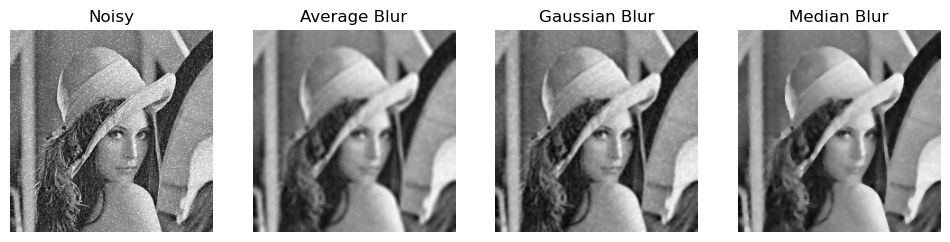

In [16]:
noise = np.random.normal(0, 25, gray.shape).astype(np.uint8)
noisy = cv2.add(gray, noise)

avg = cv2.blur(noisy, (5,5))
gauss = cv2.GaussianBlur(noisy, (5,5), 0)
median = cv2.medianBlur(noisy, 5)

plt.figure(figsize=(12,6))

titles = ["Noisy", "Average Blur", "Gaussian Blur", "Median Blur"]
images = [noisy, avg, gauss, median]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


Median filter handled noise best.

Gaussian blur preserved edges better than average blur.

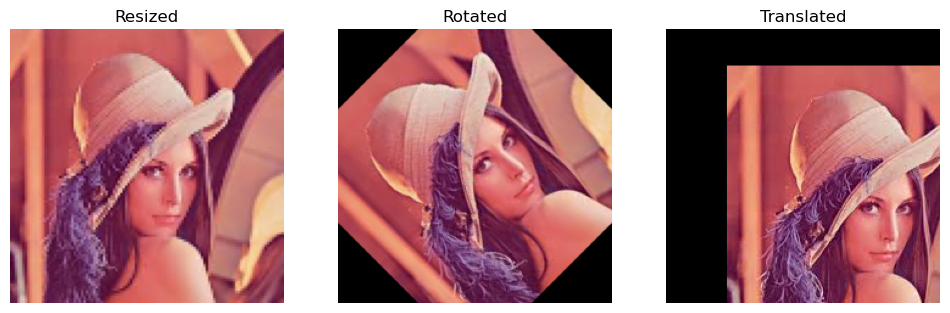

In [17]:
h, w = img.shape[:2]

resized = cv2.resize(img_rgb, (w//2, h//2))

center = (w//2, h//2)
M_rot = cv2.getRotationMatrix2D(center, 45, 1)
rotated = cv2.warpAffine(img_rgb, M_rot, (w, h))

M_trans = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img_rgb, M_trans, (w, h))

plt.figure(figsize=(12,8))

images = [resized, rotated, translated]
titles = ["Resized", "Rotated", "Translated"]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()


Geometric transformations introduce black regions because pixels move outside the original image boundary, leaving empty areas filled with default values (black).

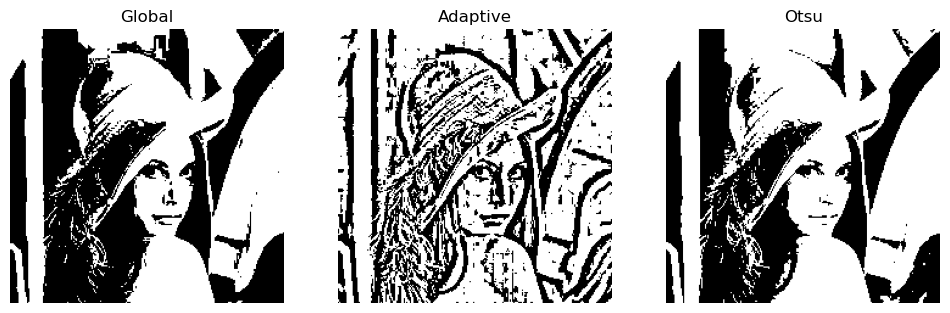

In [18]:
_, th_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

th_adapt = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, 11, 2)

_, th_otsu = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12,4))
titles = ["Global", "Adaptive", "Otsu"]
images = [th_global, th_adapt, th_otsu]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()


Otsu’s thresholding worked best because it automatically finds an optimal threshold.

Global thresholding fails badly under uneven lighting conditions.

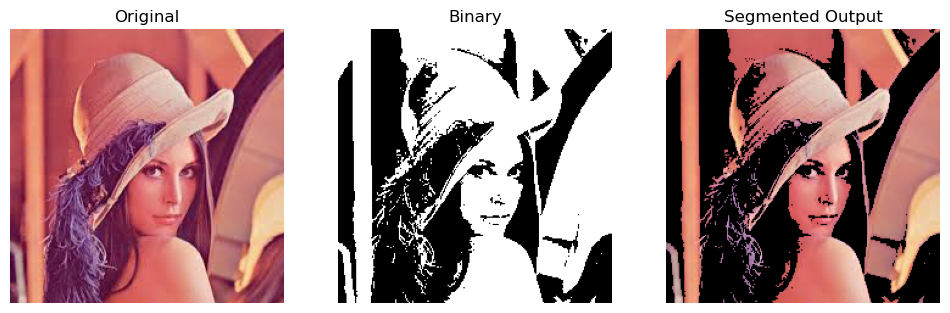

In [19]:
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

masked = cv2.bitwise_and(img_rgb, img_rgb, mask=binary)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(binary, cmap="gray")
plt.title("Binary")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(masked)
plt.title("Segmented Output")
plt.axis("off")

plt.show()


 1) To reduce noise that may cause incorrect segmentation and fragmented regions.

2) HSV separates color (Hue) from illumination, making segmentation robust to lighting changes.

3) Yes, it may amplify noise or alter intensity distributions, confusing threshold selection.

4) Built-in functions are optimized in C/C++, faster, safer, and less error-prone than manual loops.

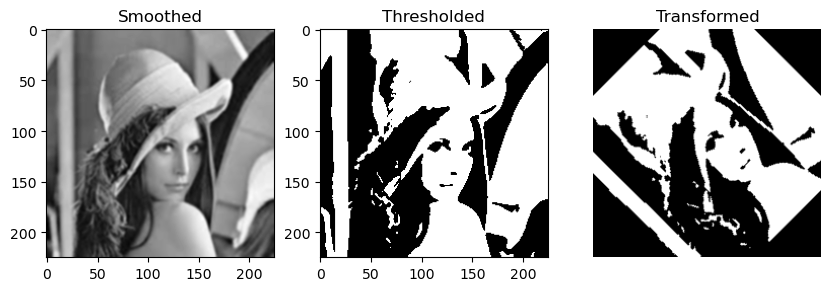

In [20]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
rot = cv2.warpAffine(thresh, M_rot, (w, h))

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(blur, cmap="gray")
plt.title("Smoothed")

plt.subplot(1,3,2)
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded")

plt.subplot(1,3,3)
plt.imshow(rot, cmap="gray")
plt.title("Transformed")

plt.axis("off")
plt.show()
